In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams

df = pd.read_csv('data.csv')
df = df[["chol", "fbs", "restecg"]]

df

,chol,fbs,restecg
0,233.0,1.0,2.0
1,286.0,0.0,2.0
2,229.0,0.0,2.0
3,250.0,0.0,0.0
4,204.0,0.0,2.0
...,...,...,...
298,264.0,0.0,0.0
299,193.0,1.0,0.0
300,131.0,0.0,0.0
301,236.0,0.0,2.0


In [50]:
# Cria coluna 'highchol"
# retorna 1 para cada linha do DataFrame onde chol é maior que 240.0 (considerado colesterol alto de acordo com a referência)

df["highchol"] = [1.0 if i > 240.0 else 0.0 for i in df["chol"]]

df


,chol,fbs,restecg,highchol
0,233.0,1.0,2.0,0.0
1,286.0,0.0,2.0,1.0
2,229.0,0.0,2.0,0.0
3,250.0,0.0,0.0,1.0
4,204.0,0.0,2.0,0.0
...,...,...,...,...
298,264.0,0.0,0.0,1.0
299,193.0,1.0,0.0,0.0
300,131.0,0.0,0.0,0.0
301,236.0,0.0,2.0,0.0


In [51]:
# Cria coluna 'highcholfbs'
# Retorna 1 Para cada linha do DataFrame onde ambos 'highchol' e 'fbs' == 1

s1 = [1.0 if (value == df["fbs"][id] == 1) else 0.0 for id, value in enumerate(df["highchol"])]

df["highcholfbs"] = s1

df


,chol,fbs,restecg,highchol,highcholfbs
0,233.0,1.0,2.0,0.0,0.0
1,286.0,0.0,2.0,1.0,0.0
2,229.0,0.0,2.0,0.0,0.0
3,250.0,0.0,0.0,1.0,0.0
4,204.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...
298,264.0,0.0,0.0,1.0,0.0
299,193.0,1.0,0.0,0.0,0.0
300,131.0,0.0,0.0,0.0,0.0
301,236.0,0.0,2.0,0.0,0.0


In [52]:
# Cria nova coluna 'leftvh' (Left Ventricular Hypertrophy)
# Retorna 1 para cada linha do DataFrame onde 'restecg' == 2 ('restecg' == 2 significa positivo para Hipertrofia ventricular esquerda do coração)

df["leftvh"] = [1.0 if i == 2.0 else 0.0 for i in df["restecg"]]

df

,chol,fbs,restecg,highchol,highcholfbs,leftvh
0,233.0,1.0,2.0,0.0,0.0,1.0
1,286.0,0.0,2.0,1.0,0.0,1.0
2,229.0,0.0,2.0,0.0,0.0,1.0
3,250.0,0.0,0.0,1.0,0.0,0.0
4,204.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...
298,264.0,0.0,0.0,1.0,0.0,0.0
299,193.0,1.0,0.0,0.0,0.0,0.0
300,131.0,0.0,0.0,0.0,0.0,0.0
301,236.0,0.0,2.0,0.0,0.0,1.0


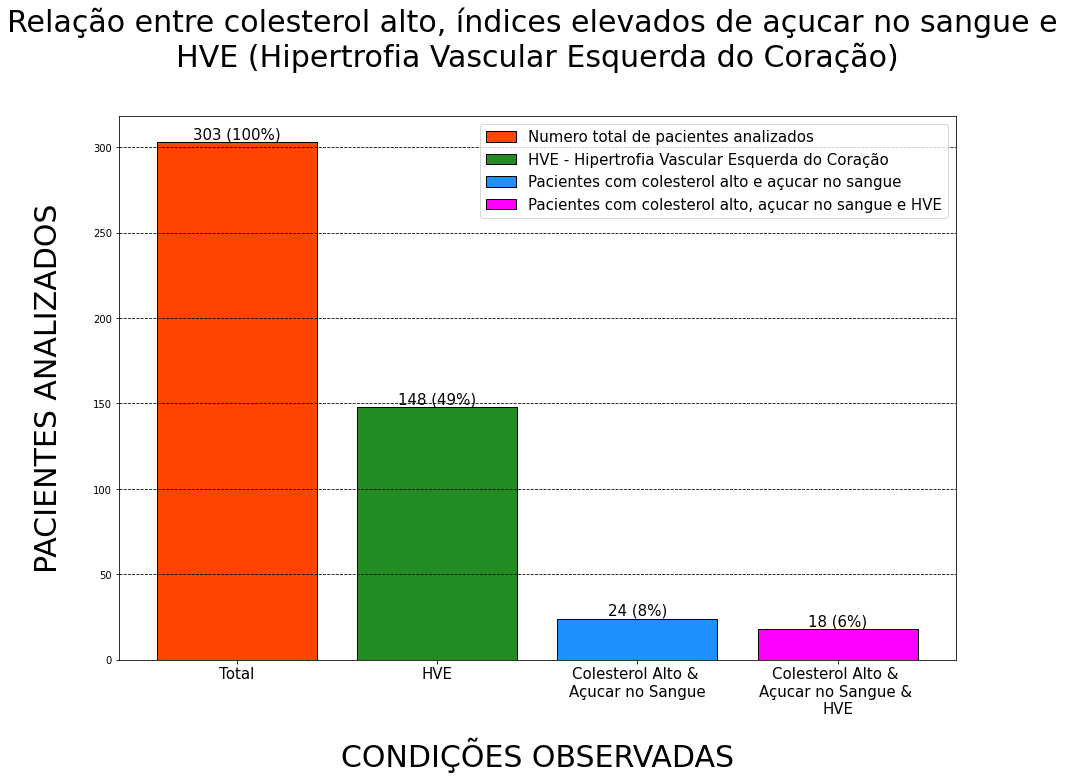

In [53]:
# Retorna quantidade total de pacientes
total = len(df)

# Retorna quantidade de pacientes com HVE (Hipertrofia Ventricular Esquerda)
leftvh = len(df[
    (df['restecg'] == 2)
])

# Retorna quantidade de pacientes com colesterol alto e açucar no sangue
cholfbs = len(df[
    (df['chol'] > 240.0) & 
    (df['fbs'] == 1)
])

# Retorna quantidade de pacientes com colesterol alto, açucar no sangue e HVE
cholfbs_and_leftvh = len(df[(df['chol'] > 240.0) & 
                            (df['fbs'] == 1) &
                            (df['restecg'] == 2)
                        ])


# Matplotlib plotting
x = np.array(["Total", "HVE", "Colesterol Alto & \nAçucar no Sangue", "Colesterol Alto & \nAçucar no Sangue & \nHVE"])
y = np.array([total, leftvh, cholfbs, cholfbs_and_leftvh])

rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(15,10))

ax = plt.subplot(111)
ax.bar(x,y, color=['orangered', 'forestgreen', 'dodgerblue', 'magenta'], edgecolor="black")

for bar in ax.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  bar_height = int(bar.get_height())
  ax.annotate(f"{bar_height} ({round(bar_height/total*100)}%)",
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center',
                  size=15, xytext=(0, 8),
                  textcoords='offset points')

ax.set_title("Relação entre colesterol alto, índices elevados de açucar no sangue e \nHVE (Hipertrofia Vascular Esquerda do Coração)", size=30, pad=50)
ax.set_xlabel("CONDIÇÕES OBSERVADAS", size=30, labelpad=20)
ax.set_ylabel("PACIENTES ANALIZADOS", size=30, labelpad=30)
ax.grid(axis='y', color='black', linestyle ='--')

patch1 = mpatches.Patch(color='orangered', label='Numero total de pacientes analizados', ec="black")
patch2 = mpatches.Patch(color='forestgreen', label='HVE - Hipertrofia Vascular Esquerda do Coração', ec="black")
patch3 = mpatches.Patch(color='dodgerblue', label='Pacientes com colesterol alto e açucar no sangue', ec="black")
patch4 = mpatches.Patch(color='magenta', label='Pacientes com colesterol alto, açucar no sangue e HVE', ec="black")
ax.legend(handles=[patch1, patch2, patch3, patch4], fontsize=15)

plt.xticks(size=15, ha="center", rotation_mode="anchor")

plt.show()


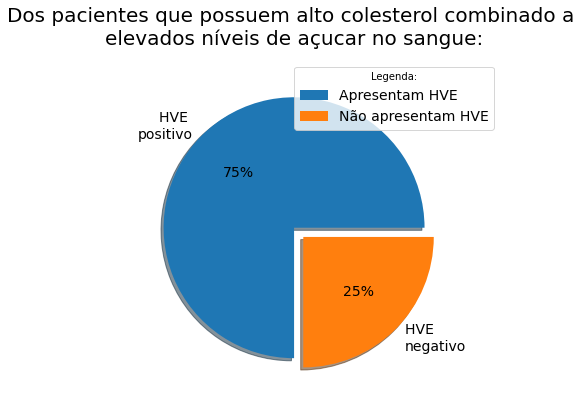

In [54]:
#labels = ["Colesterol Alto + Açucar no Sangue", "Colesterol Alto + Açucar no Sangue + \nHipertrofia Ventricular Esquerda"]

reminder = cholfbs-cholfbs_and_leftvh
x = np.array([cholfbs_and_leftvh, reminder])

rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(8, 6), facecolor="white")
plt.title("Dos pacientes que possuem alto colesterol combinado a \nelevados níveis de açucar no sangue:", size=20, pad=20)
plt.pie(x, labels=["HVE \npositivo", "HVE \nnegativo"], explode=[0, 0.1], shadow=True, autopct=lambda pct: f"{round(pct)}%", textprops={"fontsize": 14})
plt.legend(title = "Legenda:", labels=["Apresentam HVE", "Não apresentam HVE"], loc=[0.5,0.8], fontsize=14)
plt.show() 